In [1]:
import sys
print(sys.version)

3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import yfinance as yf

In [5]:
#See the yahoo finance ticker for your stock symbol
stock_symbol = 'ASIANPAINT.NS'

In [73]:
df = yf.download(tickers=stock_symbol, period = "max", interval = "1d")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,21.367001,22.466999,21.367001,22.287001,16.755398,87810
2002-07-02,21.370001,22.783001,21.370001,22.520000,16.930569,588615
2002-07-03,22.267000,22.799999,21.933001,22.733000,17.090702,162075
2002-07-04,22.667000,23.333000,22.667000,22.966999,17.266624,266625
2002-07-05,23.400000,25.000000,23.333000,24.056999,18.086086,408600


In [74]:
data = df

In [7]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [8]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,21.367001,22.466999,21.367001,22.287001,16.755396,87810
1,2002-07-02,21.370001,22.783001,21.370001,22.520000,16.930569,588615
2,2002-07-03,22.267000,22.799999,21.933001,22.733000,17.090696,162075
3,2002-07-04,22.667000,23.333000,22.667000,22.966999,17.266619,266625
4,2002-07-05,23.400000,25.000000,23.333000,24.056999,18.086082,408600


In [9]:
df.shape

(5030, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5030 non-null   datetime64[ns]
 1   Open       5030 non-null   float64       
 2   High       5030 non-null   float64       
 3   Low        5030 non-null   float64       
 4   Close      5030 non-null   float64       
 5   Adj Close  5030 non-null   float64       
 6   Volume     5030 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 275.2 KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03
mean,749.822791,758.664988,740.428886,749.502057,727.212486,8.616574e+05
std,882.739774,892.585542,872.073795,882.480934,878.163425,9.535931e+05
min,20.132999,21.007000,20.132999,20.773001,16.067343,0.000000e+00
25%,79.823751,80.891249,78.500000,79.847502,69.716492,2.110600e+05
50%,373.100006,377.632492,369.130005,373.502487,345.306137,6.480950e+05
75%,1149.487488,1158.637512,1136.425049,1149.349976,1109.408600,1.161442e+06
max,3580.000000,3590.000000,3534.000000,3576.300049,3555.808838,1.871721e+07


In [12]:
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file="Asian Paints.html")

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  result = (True, func(*args, **kwds))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
df = df.reset_index()['Close']
df.head()

0    22.287001
1    22.520000
2    22.733000
3    22.966999
4    24.056999
Name: Close, dtype: float64

In [15]:
df.sample(10)

4522    2035.949951
117       22.003000
1012      54.549999
736       37.455002
4338    1745.400024
1478     128.029999
2221     274.299988
3252     848.049988
669       34.810001
4291    1773.449951
Name: Close, dtype: float64

In [16]:
df1 = df

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1

array([[4.25815897e-04],
       [4.91347617e-04],
       [5.51254162e-04],
       ...,
       [9.49079265e-01],
       [9.61116876e-01],
       [9.68316892e-01]])

Starting For LSTM

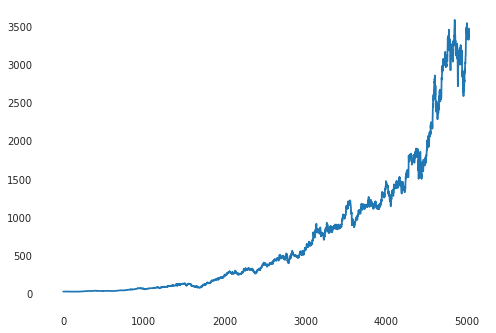

In [19]:
plt.plot(df)

In [20]:
ma100=df.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5025    3088.787493
5026    3090.775493
5027    3092.727993
5028    3096.099993
5029    3099.970991
Name: Close, Length: 5030, dtype: float64

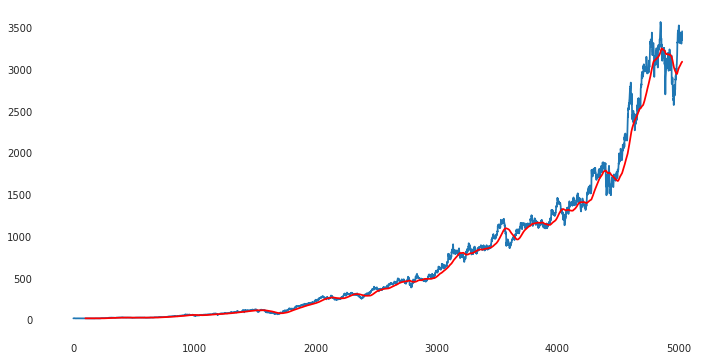

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df)
plt.plot(ma100,'r')

In [22]:
ma200=df.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5025    3136.185240
5026    3137.812991
5027    3139.597740
5028    3141.636240
5029    3143.411990
Name: Close, Length: 5030, dtype: float64

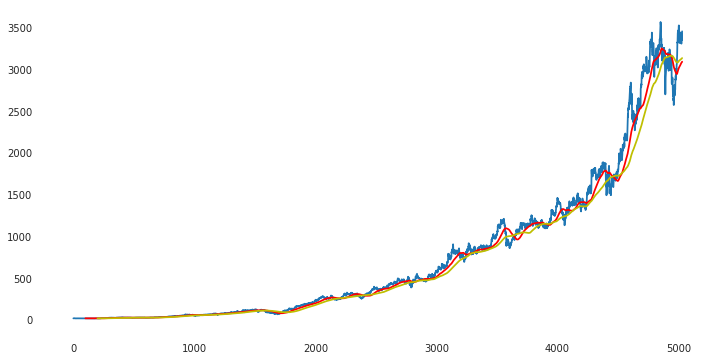

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df)
plt.plot(ma100,'r')
plt.plot(ma200,'y')

In [24]:
# to check row and columns
df.shape

(5030,)

In [25]:
# spliting data into trainging and testing
data_training=pd.DataFrame(df[0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df[int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3521, 1)
(1509, 1)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array=scaler.fit_transform(data_training)

In [28]:
#Spliting Data into x_train and y_train
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train.shape,y_train.shape

((3421, 100, 1), (3421,))

In [30]:
data_training.tail(100)

,Close
3421,850.000000
3422,845.400024
3423,856.099976
3424,881.849976
3425,868.400024
...,...
3516,1145.099976
3517,1137.500000
3518,1129.650024
3519,1113.550049


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

,Close
0,850.000000
1,845.400024
2,856.099976
3,881.849976
4,868.400024


In [33]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00168442],
       [0.        ],
       [0.0039181 ],
       ...,
       [0.93370316],
       [0.94937566],
       [0.95874981]])

In [34]:
input_data.shape

(1609, 1)

In [35]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1509, 100, 1)
(1509,)


ML Model

In [36]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [37]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=100,verbose=1)

Epoch 1/100
54/54 [==============================] - 29s 458ms/step - loss: 0.0204 - val_loss: 0.0025
Epoch 2/100
54/54 [==============================] - 24s 447ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 3/100
54/54 [==============================] - 24s 446ms/step - loss: 0.0035 - val_loss: 0.0067
Epoch 4/100
54/54 [==============================] - 25s 473ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 5/100
54/54 [==============================] - 24s 448ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 6/100
54/54 [==============================] - 24s 446ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 7/100
54/54 [==============================] - 24s 448ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 8/100
54/54 [==============================] - 24s 447ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 9/100
54/54 [==============================] - 24s 445ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 10/100
54/54 [==============================] - 24s 447ms/step - loss: 0.002

In [41]:
model.save('keras_model100.h5')

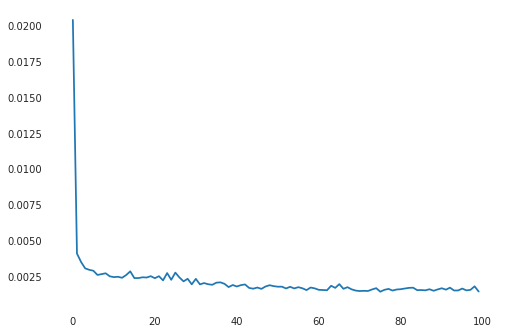

In [42]:
#Plotting loss, it showed that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [43]:
# Making predictions on train and test data and checking the RMSE Performance Matrix
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [44]:
#Get the root mean squared error of Train data for LSTM model of 100 epochs (RMSE)
rmse=np.sqrt(np.mean(((train_predict- y_train)**2)))
rmse

0.3280577606228679

In [45]:
#Get the root mean squared error of Test data for LSTM model of 100 epochs (RMSE)
rmse=np.sqrt(np.mean(((test_predict- y_test)**2)))
rmse

0.3945203562450549

In [46]:
y_test

array([0.09817275, 0.09831923, 0.10284154, ..., 0.93370316, 0.94937566,
       0.95874981])

In [47]:
data_test = y_test

In [48]:
test_predict

array([[0.10728499],
       [0.10839227],
       [0.10941522],
       ...,
       [0.9151311 ],
       [0.9159589 ],
       [0.91723466]], dtype=float32)

In [49]:
## Transform back to get original values
train_predict=scaler.inverse_transform(train_predict)

In [50]:
test_predict=scaler.inverse_transform(test_predict)

In [51]:
y_test = y_test.reshape(-1, 1)

In [52]:
y_test=scaler.inverse_transform(y_test)

In [53]:
train_predict

array([[ 950.48615],
       [ 950.43024],
       [ 950.3733 ],
       ...,
       [3384.3608 ],
       [3397.1294 ],
       [3408.416  ]], dtype=float32)

In [54]:
test_predict

array([[1138.3846],
       [1141.4084],
       [1144.202 ],
       ...,
       [3344.5315],
       [3346.7922],
       [3350.2761]], dtype=float32)

In [55]:
y_test

array([[1113.5       ],
       [1113.90002441],
       [1126.25      ],
       ...,
       [3395.25      ],
       [3438.05004883],
       [3463.64990234]])

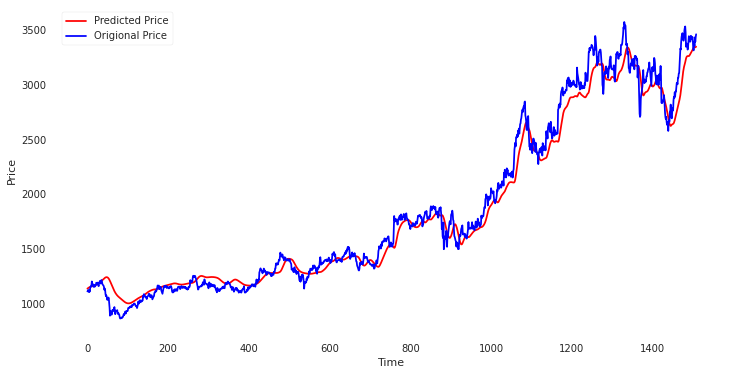

In [56]:
plt.figure(figsize=(12,6))
plt.plot(test_predict, 'r', label = 'Predicted Price')
plt.plot(y_test, 'b', label='Origional Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
for i in range(len(y_test)):
  print(y_test[i],test_predict[i])

[1113.5] [1138.3846]
[1113.90002441] [1141.4084]
[1126.25] [1144.202]
[1118.84997559] [1146.7698]
[1105.90002441] [1149.1147]
[1123.30004883] [1151.236]
[1111.84997559] [1153.1415]
[1146.19995117] [1154.8376]
[1157.90002441] [1156.3468]
[1156.94995117] [1157.6964]
[1167.55004883] [1158.9229]
[1204.15002441] [1160.048]
[1177.19995117] [1161.1033]
[1182.59997559] [1162.1133]
[1171.75] [1163.0999]
[1154.59997559] [1164.1051]
[1163.59997559] [1165.1583]
[1173.55004883] [1166.2777]
[1155.15002441] [1167.4985]
[1163.59997559] [1168.8422]
[1165.05004883] [1170.3147]
[1170.59997559] [1171.913]
[1192.] [1173.6285]
[1191.19995117] [1175.4807]
[1183.] [1177.4851]
[1192.55004883] [1179.6477]
[1193.5] [1181.9724]
[1167.34997559] [1184.4617]
[1160.69995117] [1187.1052]
[1193.] [1189.8817]
[1192.55004883] [1192.7762]
[1208.75] [1195.7748]
[1209.5] [1198.8706]
[1184.59997559] [1202.0619]
[1212.65002441] [1205.3398]
[1216.59997559] [1208.7037]
[1205.75] [1212.1589]
[1182.30004883] [1215.7083]
[1174.5] 

In [58]:
data_test = pd.DataFrame(data_test,columns=['Data_test'])

In [59]:
#Getting the last 100 days record
x_input=data_test.tail(100).values.reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
x_input 

array([[0.79492107, 0.7908931 , 0.8205903 , 0.80861616, 0.80359951,
        0.81240615, 0.788934  , 0.80727964, 0.82562527, 0.80614444,
        0.82923209, 0.85275913, 0.82077339, 0.72966788, 0.7304368 ,
        0.72849612, 0.73184663, 0.7375773 , 0.73495916, 0.75548354,
        0.7475557 , 0.72212454, 0.69548497, 0.68102088, 0.67428321,
        0.68232083, 0.66474421, 0.65546152, 0.66489064, 0.6635358 ,
        0.63524842, 0.66472588, 0.67118901, 0.66679485, 0.7004284 ,
        0.70141706, 0.72340617, 0.68882052, 0.67831118, 0.67735908,
        0.70590276, 0.7121828 , 0.70350436, 0.73821812, 0.74920351,
        0.74495588, 0.76445494, 0.74986265, 0.76743927, 0.76668859,
        0.78096959, 0.795507  , 0.79596472, 0.79133249, 0.81317516,
        0.81365113, 0.82740119, 0.82870114, 0.85709839, 0.88871795,
        0.91118311, 0.90781427, 0.93403268, 0.9499615 , 0.95759638,
        0.96250315, 0.95684569, 0.93970847, 0.93734663, 0.94564065,
        0.97242665, 0.98073891, 0.98500496, 0.96

In [61]:
#Creating the list of last 100 data
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [62]:
temp_input

[0.7949210722394392,
 0.7908930961503621,
 0.8205903010759253,
 0.8086161551825707,
 0.8035995119333127,
 0.8124061502624788,
 0.7889339992927619,
 0.8072796352400168,
 0.8256252711872719,
 0.8061444425824552,
 0.8292320870456219,
 0.8527591292022768,
 0.8207733908981562,
 0.7296678774762552,
 0.7304368010900281,
 0.7284961204938437,
 0.7318466284809361,
 0.7375773041570285,
 0.7349591554588594,
 0.755483542410795,
 0.747555699468606,
 0.7221245410406162,
 0.695484971906038,
 0.6810208759498064,
 0.6742832062514447,
 0.6823208315675103,
 0.6647442086333556,
 0.6554615188865243,
 0.6648906447314094,
 0.663535797926767,
 0.6352484203921117,
 0.6647258817712671,
 0.67118900613561,
 0.6667948504020712,
 0.7004283971062689,
 0.7014170642664498,
 0.7234061697962316,
 0.688820520256703,
 0.6783111823405218,
 0.6773590795051908,
 0.7059027649111037,
 0.7121827994532158,
 0.7035043597593423,
 0.7382181185348363,
 0.7492035078686831,
 0.7449558776325252,
 0.7644549437001033,
 0.7498626491085792,

In [63]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.9191265106201172], [0.9209250807762146], [0.9222299456596375], [0.9230778217315674], [0.9235780239105225], [0.9238705635070801], [0.92405766248703], [0.924210250377655], [0.9243676662445068], [0.9245504140853882], [0.9247666001319885], [0.925017774105072], [0.9253023862838745], [0.9256181716918945], [0.9259635806083679], [0.9263350963592529], [0.9267316460609436], [0.9271509647369385], [0.9275936484336853], [0.9280590415000916], [0.9285469651222229], [0.9290582537651062], [0.929593563079834], [0.9301541447639465], [0.930740237236023], [0.9313527941703796], [0.9319927096366882], [0.9326613545417786], [0.9333601593971252], [0.9340894818305969]]


In [64]:
#Creating a dummy plane to plot graph one after another
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [65]:
df1

array([[4.25815897e-04],
       [4.91347617e-04],
       [5.51254162e-04],
       ...,
       [9.49079265e-01],
       [9.61116876e-01],
       [9.68316892e-01]])

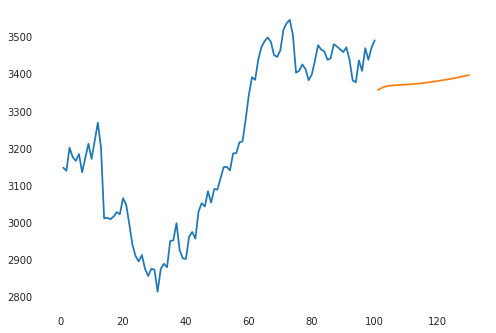

In [68]:
plt.plot(day_new,scaler.inverse_transform((df1[(len(df1)-100):])))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

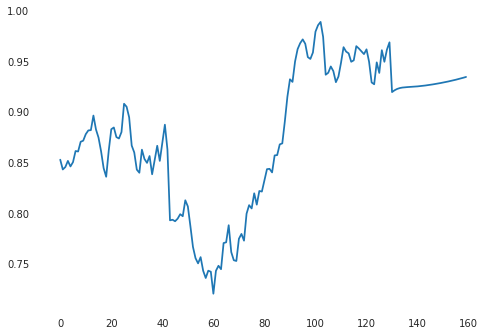

In [69]:
df2=df1.tolist()
df2.extend(lst_output)
plt.plot(df2[4900:])

In [70]:
#Creating final data for plotting
final_graph = scaler.inverse_transform(df2).tolist()

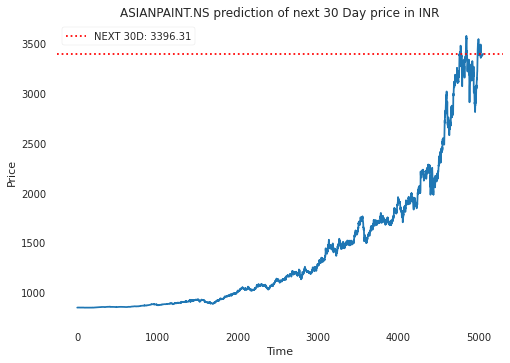

In [71]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next 30 Day price in INR".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [75]:
data.reset_index(inplace=True)

In [76]:
data = data[['Date','Close']]

In [77]:
data.head()

,Date,Close
0,2002-07-01,22.287001
1,2002-07-02,22.520000
2,2002-07-03,22.733000
3,2002-07-04,22.966999
4,2002-07-05,24.056999


In [78]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 133 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638685 sha256=4da4e20fc2c21977d9b2512e992b7bba199d0b5f0113e888a30167edaedda6b6
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [79]:
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

In [80]:
data.head()

,ds,y
0,2002-07-01,22.287001
1,2002-07-02,22.520000
2,2002-07-03,22.733000
3,2002-07-04,22.966999
4,2002-07-05,24.056999


In [81]:
from fbprophet import Prophet
m = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

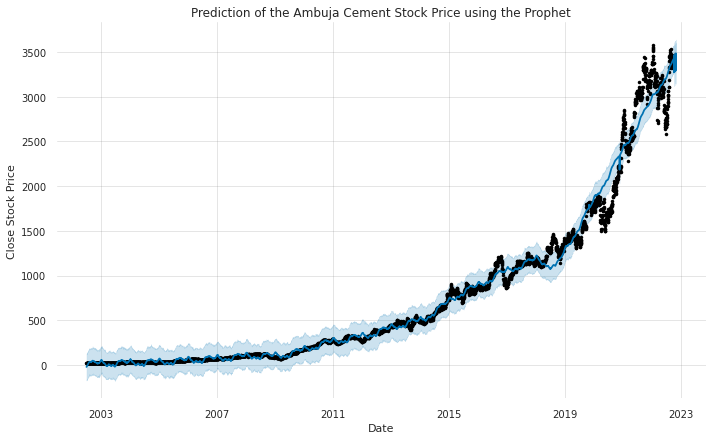

In [82]:
future= m.make_future_dataframe(periods=30) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Ambuja Cement Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

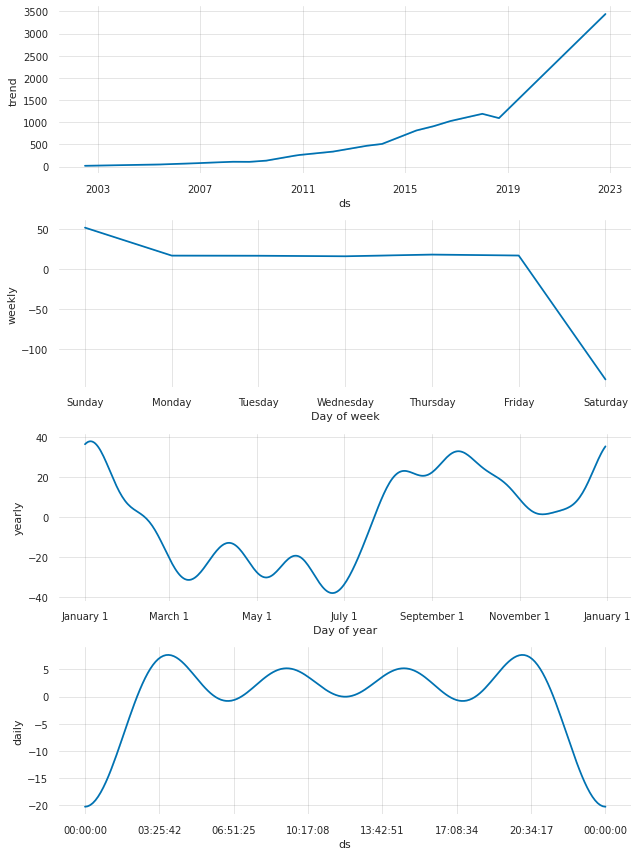

In [83]:
m.plot_components(prediction)
plt.show()